In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
data = pd.read_csv('data/nlp_train.csv')
data.head()

,eventid,gname,nlp
0,199801010001,Hutu extremists,BurundiSub-Saharan AfricaBujumbura MairieBujum...
1,199801010003,Loyalist Volunteer Forces (LVF),United KingdomWestern EuropeNorthern IrelandBe...
2,199801040001,Kosovo Liberation Army (KLA),MacedoniaEastern EuropeKumanovo (Municipality)...
3,199801040002,Kosovo Liberation Army (KLA),MacedoniaEastern EuropePrilep (Municipality)Pr...
4,199801050003,Hutu extremists,RwandaSub-Saharan AfricaGitaramaGitaramaNArmed...


In [3]:
df2 = data.groupby(by=['gname'])['nlp'].apply(lambda x: ''.join(x))
data2 =pd.DataFrame({"gname":df2.index,"nlp_all":df2})

In [4]:
data2

,gname,nlp_all
gname,,
11-Sep,11-Sep,New ZealandAustralasia & OceaniaGreater Wellin...
14 K Triad,14 K Triad,MacauEast AsiaMacau (Special Administrative Re...
14 March Coalition,14 March Coalition,LebanonMiddle East & North AfricaNorthTripoliI...
15-May,15-May,GreeceWestern EuropeAtticaAthensNFacility/Infr...
1920 Revolution Brigades,1920 Revolution Brigades,IraqMiddle East & North AfricaBaghdadBaghdadNB...
23 May Democratic Alliance (Algeria),23 May Democratic Alliance (Algeria),SomaliaSub-Saharan AfricaBayBurhakabaNHostage ...
28s,28s,South AfricaSub-Saharan AfricaWestern CapeCape...
313 Brigade (Syria),313 Brigade (Syria),LebanonMiddle East & North AfricaBeqaaZahleInt...
A'chik Matgrik Elite Force (AMEF),A'chik Matgrik Elite Force (AMEF),IndiaSouth AsiaMeghalayaShillongNBombing/Explo...


In [ ]:
#data2.to_csv('data/test4_train_nlp.csv', index=False)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(data2['nlp_all'])
train_x = tfidf.transform(data2['nlp_all'])
print('tfidf prepared !')

tfidf prepared !


In [15]:
train_x

<1582x69082 sparse matrix of type '<class 'numpy.float64'>'
	with 327001 stored elements in Compressed Sparse Row format>

In [49]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
train_y = enc.fit_transform(data2.gname.values)

In [50]:
train_y

array([   0,    1,    2, ..., 1579, 1580, 1581], dtype=int64)

In [51]:
enc.inverse_transform(train_y)

C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['11-Sep', '14 K Triad', '14 March Coalition', ...,
       'Zuwar al-Imam Rida', 'Zviadists', 'Zwai Tribe'], dtype=object)

In [115]:
tmp1 = pd.DataFrame({"node_id": train_y, "gname": enc.inverse_transform(train_y)})

tmp1

C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,gname,node_id
0,11-Sep,0
1,14 K Triad,1
2,14 March Coalition,2
3,15-May,3
4,1920 Revolution Brigades,4
5,23 May Democratic Alliance (Algeria),5
6,28s,6
7,313 Brigade (Syria),7
8,A'chik Matgrik Elite Force (AMEF),8
9,Aba Cheali Group,9


In [116]:
tmp1.to_csv('data/test4_node_id.csv', index=False)

model1

In [17]:
from sklearn import ensemble, metrics, model_selection, naive_bayes
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_x, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
predictions = clf.predict_proba(train_x)
out_df = pd.DataFrame(predictions)
out_df.columns = list(enc.classes_)

In [19]:
pred = out_df.idxmax(axis=1)

tmp1 = pd.DataFrame({"gname1": pred})

model2

In [54]:
from sklearn.model_selection import train_test_split
train1, train2, test1, test2 = train_test_split(train_x, data2.gname.values, random_state=42, test_size=0.8, shuffle=True)

In [55]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()

svc.fit(train2, test2)

pred2 = svc.predict(train_x)

In [56]:
tmp2 = pd.DataFrame({"gname2": pred2})

合并

In [57]:
tmp_out = pd.DataFrame({"gname1": tmp1.gname1.values,"gname2": tmp2.gname2.values})

In [58]:
tmp_out.to_csv('data/test4_gnamelink.csv', index=False)

In [59]:
tmp_out.head()

,gname1,gname2
0,11-Sep,11-Sep
1,14 K Triad,Conscientious Arsonists (CA)
2,14 March Coalition,14 March Coalition
3,15-May,15-May
4,1920 Revolution Brigades,1920 Revolution Brigades


In [60]:
tmp_out['gname1'] = enc.transform(tmp_out.gname1.values)
tmp_out['gname2'] = enc.transform(tmp_out.gname2.values)

In [61]:
tmp_out.to_csv('data/test4_gnamelink_id.csv', index=False)

画图

In [62]:
import networkx as nx

In [86]:
G=nx.Graph()  #初始化
G=nx.Graph(name='my graph')
G.add_node('a')#添加点a
for index in tmp_out.index:
    #tmp_out.loc[indexs].values[0]
    if(index < 60): 
        G.add_edge(str(tmp_out.loc[index].values[0]),str(tmp_out.loc[index].values[1]))#添加边
    

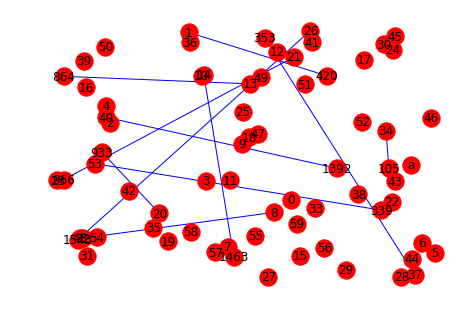

In [87]:
#需要导入matplotlib
import matplotlib.pyplot as plt
#nx.draw(G)
nx.draw(G,pos = nx.random_layout(G),node_color = 'r',edge_color = 'b',with_labels = True)
plt.show()
plt.savefig("data/links.jpg")

In [89]:
G=nx.Graph()  #初始化
G=nx.Graph(name='my graph')
G.add_node('a')#添加点a
for index in tmp_out.index:
    G.add_edge(str(tmp_out.loc[index].values[0]),str(tmp_out.loc[index].values[1]))#添加边
    

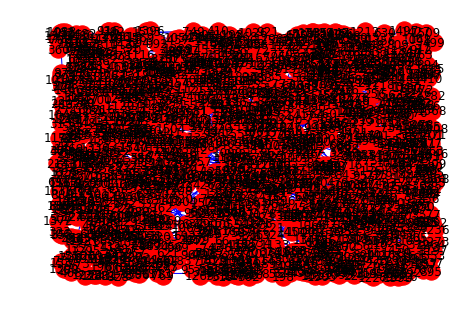

In [90]:
#需要导入matplotlib
import matplotlib.pyplot as plt
#nx.draw(G)
nx.draw(G,pos = nx.random_layout(G),node_color = 'r',edge_color = 'b',with_labels = True)
plt.show()
plt.savefig("data/links_all.jpg")

In [96]:
G=nx.Graph()  #初始化
G=nx.Graph(name='my graph')
G.add_node('a')#添加点a
for index in tmp_out.index:
    #tmp_out.loc[indexs].values[0]
    if(index < 80): 
        G.add_edge(str(tmp_out.loc[index].values[0]),str(tmp_out.loc[index].values[1]))#添加边
    

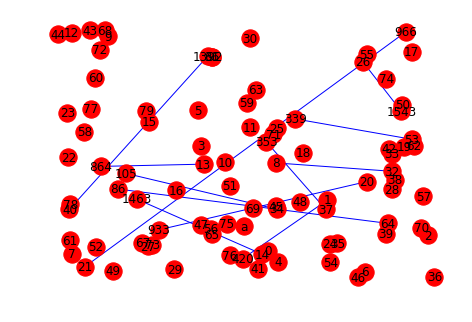

In [114]:
#需要导入matplotlib
import matplotlib.pyplot as plt
#nx.draw(G)
nx.draw(G,pos = nx.random_layout(G),node_color = 'r',edge_color = 'b',with_labels = True)
plt.show()